In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## 1. 特征工程

### 1.1 数据预览

In [5]:
train_data = pd.read_csv('./data/zhengqi_train.txt', sep='\t', encoding='utf-8')
test_data = pd.read_csv('./data/zhengqi_test.txt', sep='\t', encoding='utf-8')
train_data

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,0.190,-0.025,-0.138,0.161,0.600,-0.212,0.757,0.584,-0.026,0.904,...,0.128,-0.208,0.809,-0.173,0.247,-0.027,-0.349,0.576,0.686,0.235
2884,0.507,0.557,0.296,0.183,0.530,-0.237,0.749,0.584,0.537,0.904,...,0.291,-0.287,0.465,-0.310,0.763,0.498,-0.349,-0.615,-0.380,1.042
2885,-0.394,-0.721,-0.485,0.084,0.136,0.034,0.655,0.614,-0.818,0.904,...,0.291,-0.179,0.268,0.552,0.763,0.498,-0.349,0.951,0.748,0.005
2886,-0.219,-0.282,-0.344,-0.049,0.449,-0.140,0.560,0.583,-0.596,0.904,...,0.216,1.061,-0.051,1.023,0.878,0.610,-0.230,-0.301,0.555,0.350


In [6]:
train_data.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


### 1.2 异常值分析 
删除异常值

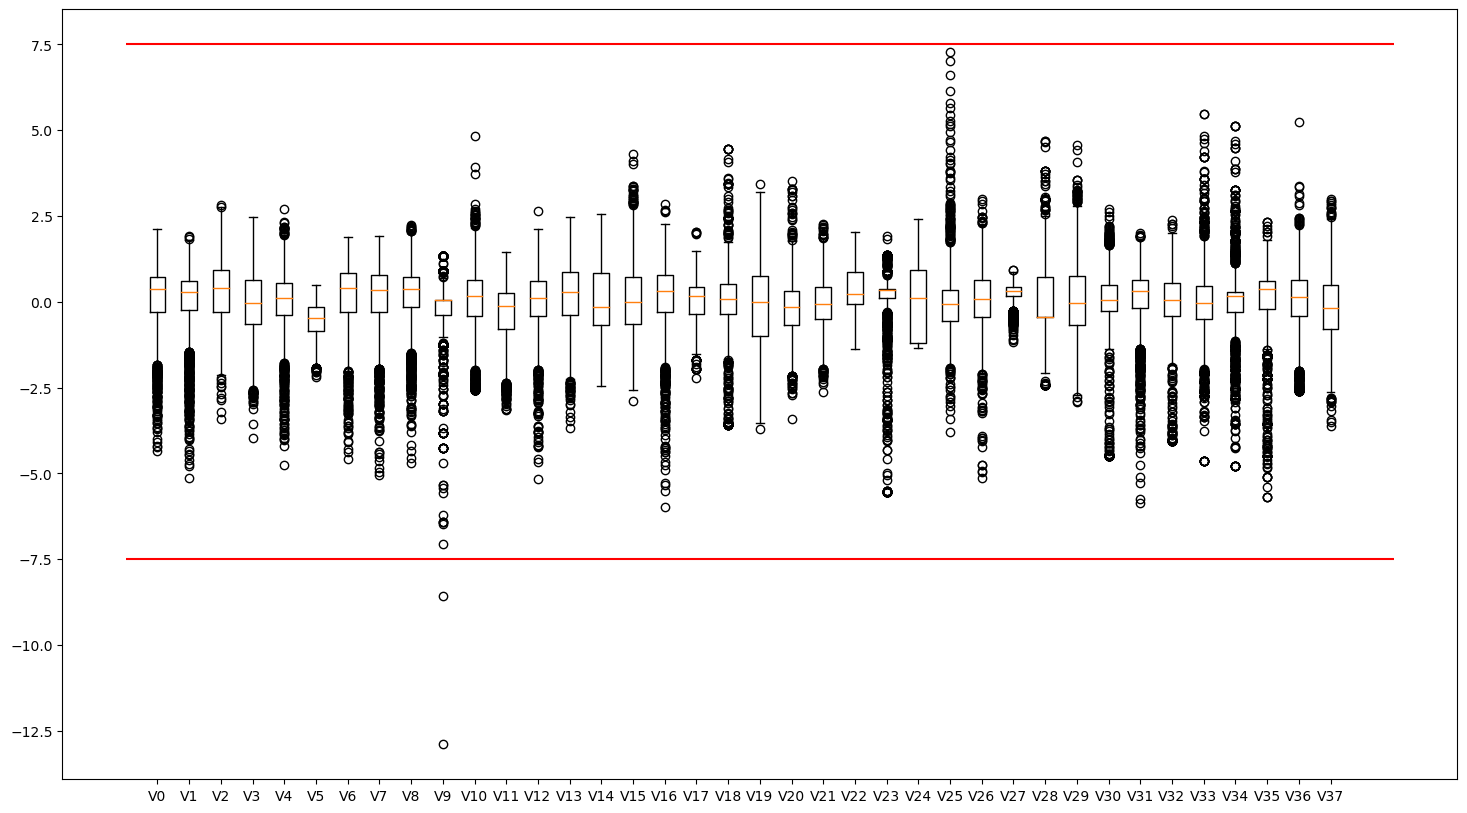

In [7]:
# 画箱形图

plt.figure(figsize=(18,10))
plt.boxplot(x=train_data.iloc[:,:-1], labels=train_data.columns[:-1])
plt.hlines([-7.5, 7.5], 0, 40, colors='r')

In [8]:
# V9存在两个明显的异常值，删除
train_without_outlier = train_data[train_data['V9']>-7.5]
train_without_outlier.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.00000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.123725,0.056856,0.290340,-0.068364,0.012254,-0.558971,0.183273,0.116274,0.178138,-0.16213,...,0.097019,0.058619,0.127617,0.023626,0.008271,0.006959,0.198513,0.030099,-0.131957,0.127451
std,0.927984,0.941269,0.911231,0.970357,0.888037,0.517871,0.918211,0.955418,0.895552,0.91089,...,1.060824,0.894311,0.873300,0.896509,1.007175,1.003411,0.985058,0.970258,1.015666,0.983144
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-7.07100,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.292000,-0.224250,-0.310000,-0.652750,-0.385000,-0.853000,-0.310000,-0.295000,-0.158750,-0.39000,...,-0.664000,-0.282000,-0.170750,-0.405000,-0.499000,-0.290000,-0.199750,-0.412750,-0.798750,-0.347500
50%,0.359500,0.273000,0.386000,-0.045000,0.109500,-0.466000,0.388500,0.345000,0.362000,0.04200,...,-0.023000,0.054500,0.299500,0.040000,-0.040000,0.160000,0.364000,0.137000,-0.186000,0.314000
75%,0.726000,0.599000,0.918750,0.623500,0.550000,-0.154000,0.831750,0.782750,0.726000,0.04200,...,0.745000,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.643750,0.493000,0.793750
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.33500,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


### 1.3 最大最小归一化

为什么先归一化，再划分训练测试集是错误的呢？  
答：   
谈不上绝对的错误。特别是当你手头已经有一份训练和测试数据。在真正的部署过程中，测试数据实际上就是那些源源不断刚刚出现的数据，你不知道它什么分布，也不知道它出现什么样的数值。所以你要用训练数据得到的均值和标准偏差，去转换它。这更加贴近部署的实际。

严格来说，测试数据你是不能去看它的，不能去统计它的各项指标，这种苛刻的自我限定，就好像测试数据真的是来自未来。当然有时候你离线建模，划分测试数据，实际上叫验证数据，主要目的是为了迭代优化算法超参数，你可以严格自我要求，也可以活个稀泥。当训练和测试数据差别不大时，先归一化还是先划分，差别实际不大。  

参考： https://www.zhihu.com/question/60490799

In [9]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler().fit(train_without_outlier.iloc[:,:-1]) # 先fit
train_data_scaled = mm_scaler.transform(train_without_outlier.iloc[:,:-1])
test_data_scaled = mm_scaler.transform(test_data)
# PS. 使用的训练集的scaler对训练集和测试集进行归一化。（用训练集的最大值最小值 对训练集和测试集进行归一化）

In [10]:
train_data_scaled = pd.DataFrame(train_data_scaled, columns=train_data.columns[:-1])
test_data_scaled = pd.DataFrame(test_data_scaled, columns=test_data.columns)
train_data_scaled['target'] = train_data['target']
train_data_scaled

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.759139,0.729830,0.524488,0.680337,0.698964,0.479596,0.427136,0.385874,0.613522,0.589698,...,0.406834,0.641467,0.666159,0.679280,0.000000,0.000000,0.074074,0.000000,0.018401,0.175
1,0.821406,0.789631,0.557939,0.705130,0.664244,0.482591,0.465152,0.385874,0.724232,0.589698,...,0.371596,0.643552,0.748349,0.721619,0.374950,0.499949,0.755580,0.289702,0.437406,0.676
2,0.828377,0.808239,0.584987,0.674567,0.653210,0.518532,0.495905,0.385874,0.733458,0.589698,...,0.387480,0.676487,0.779472,0.610577,0.374950,0.499949,0.755580,0.429901,0.458673,0.633
3,0.785006,0.779830,0.592670,0.642601,0.718746,0.562711,0.521712,0.425208,0.734467,0.589698,...,0.390683,0.684269,0.779726,0.722084,0.374950,0.477220,0.755580,0.374841,0.530618,0.206
4,0.777416,0.818182,0.588988,0.649462,0.683488,0.646949,0.541338,0.425208,0.721638,0.589698,...,0.413107,0.776126,0.785950,0.693393,0.374950,0.462067,0.755580,0.296712,0.543288,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,0.700898,0.724006,0.525288,0.641977,0.718880,0.737551,0.824138,0.808498,0.672625,0.948727,...,0.405766,0.597415,0.847053,0.601737,0.482957,0.481059,0.666667,0.405812,0.650980,0.892
2882,0.750000,0.806676,0.594750,0.645408,0.709460,0.728192,0.822902,0.808498,0.753784,0.948727,...,0.427523,0.586437,0.803354,0.580490,0.534086,0.534094,0.666667,0.254015,0.490196,0.812
2883,0.610440,0.625142,0.469750,0.629970,0.656439,0.829652,0.808376,0.812805,0.558455,0.948727,...,0.427523,0.601445,0.778328,0.714175,0.534086,0.534094,0.666667,0.453607,0.660332,0.235
2884,0.637546,0.687500,0.492318,0.609231,0.698560,0.764508,0.793695,0.808355,0.590457,0.948727,...,0.417512,0.773763,0.737805,0.787221,0.545482,0.545409,0.681506,0.294035,0.631222,1.042


In [11]:
train_data_scaled.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,...,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.690633,0.735633,0.593844,0.606212,0.639787,0.607649,0.735477,0.741354,0.702053,0.821897,...,0.401631,0.634466,0.760495,0.632231,0.459302,0.484489,0.734944,0.336235,0.527608,0.126175
std,0.143740,0.133703,0.145844,0.151311,0.119504,0.193887,0.141896,0.137154,0.129098,0.108362,...,0.141594,0.124279,0.110938,0.139037,0.099799,0.101365,0.122840,0.123663,0.153192,0.984283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626239,0.695703,0.497759,0.515087,0.586328,0.497566,0.659249,0.682314,0.653489,0.794789,...,0.300053,0.587132,0.722593,0.565757,0.409037,0.454490,0.685279,0.279792,0.427036,-0.350750
50%,0.727153,0.766335,0.609155,0.609855,0.652873,0.642456,0.767192,0.774189,0.728557,0.846181,...,0.385611,0.633894,0.782330,0.634770,0.454518,0.499949,0.755580,0.349860,0.519457,0.312500
75%,0.783922,0.812642,0.694422,0.714096,0.712152,0.759266,0.835690,0.837030,0.781029,0.846181,...,0.488121,0.694136,0.824949,0.714950,0.504261,0.511365,0.785260,0.414447,0.621870,0.793750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


### 1.4查看训练集合测试集的分布情况

删除分布不一致的特征，分布不一致的特征会导致泛化能力变差

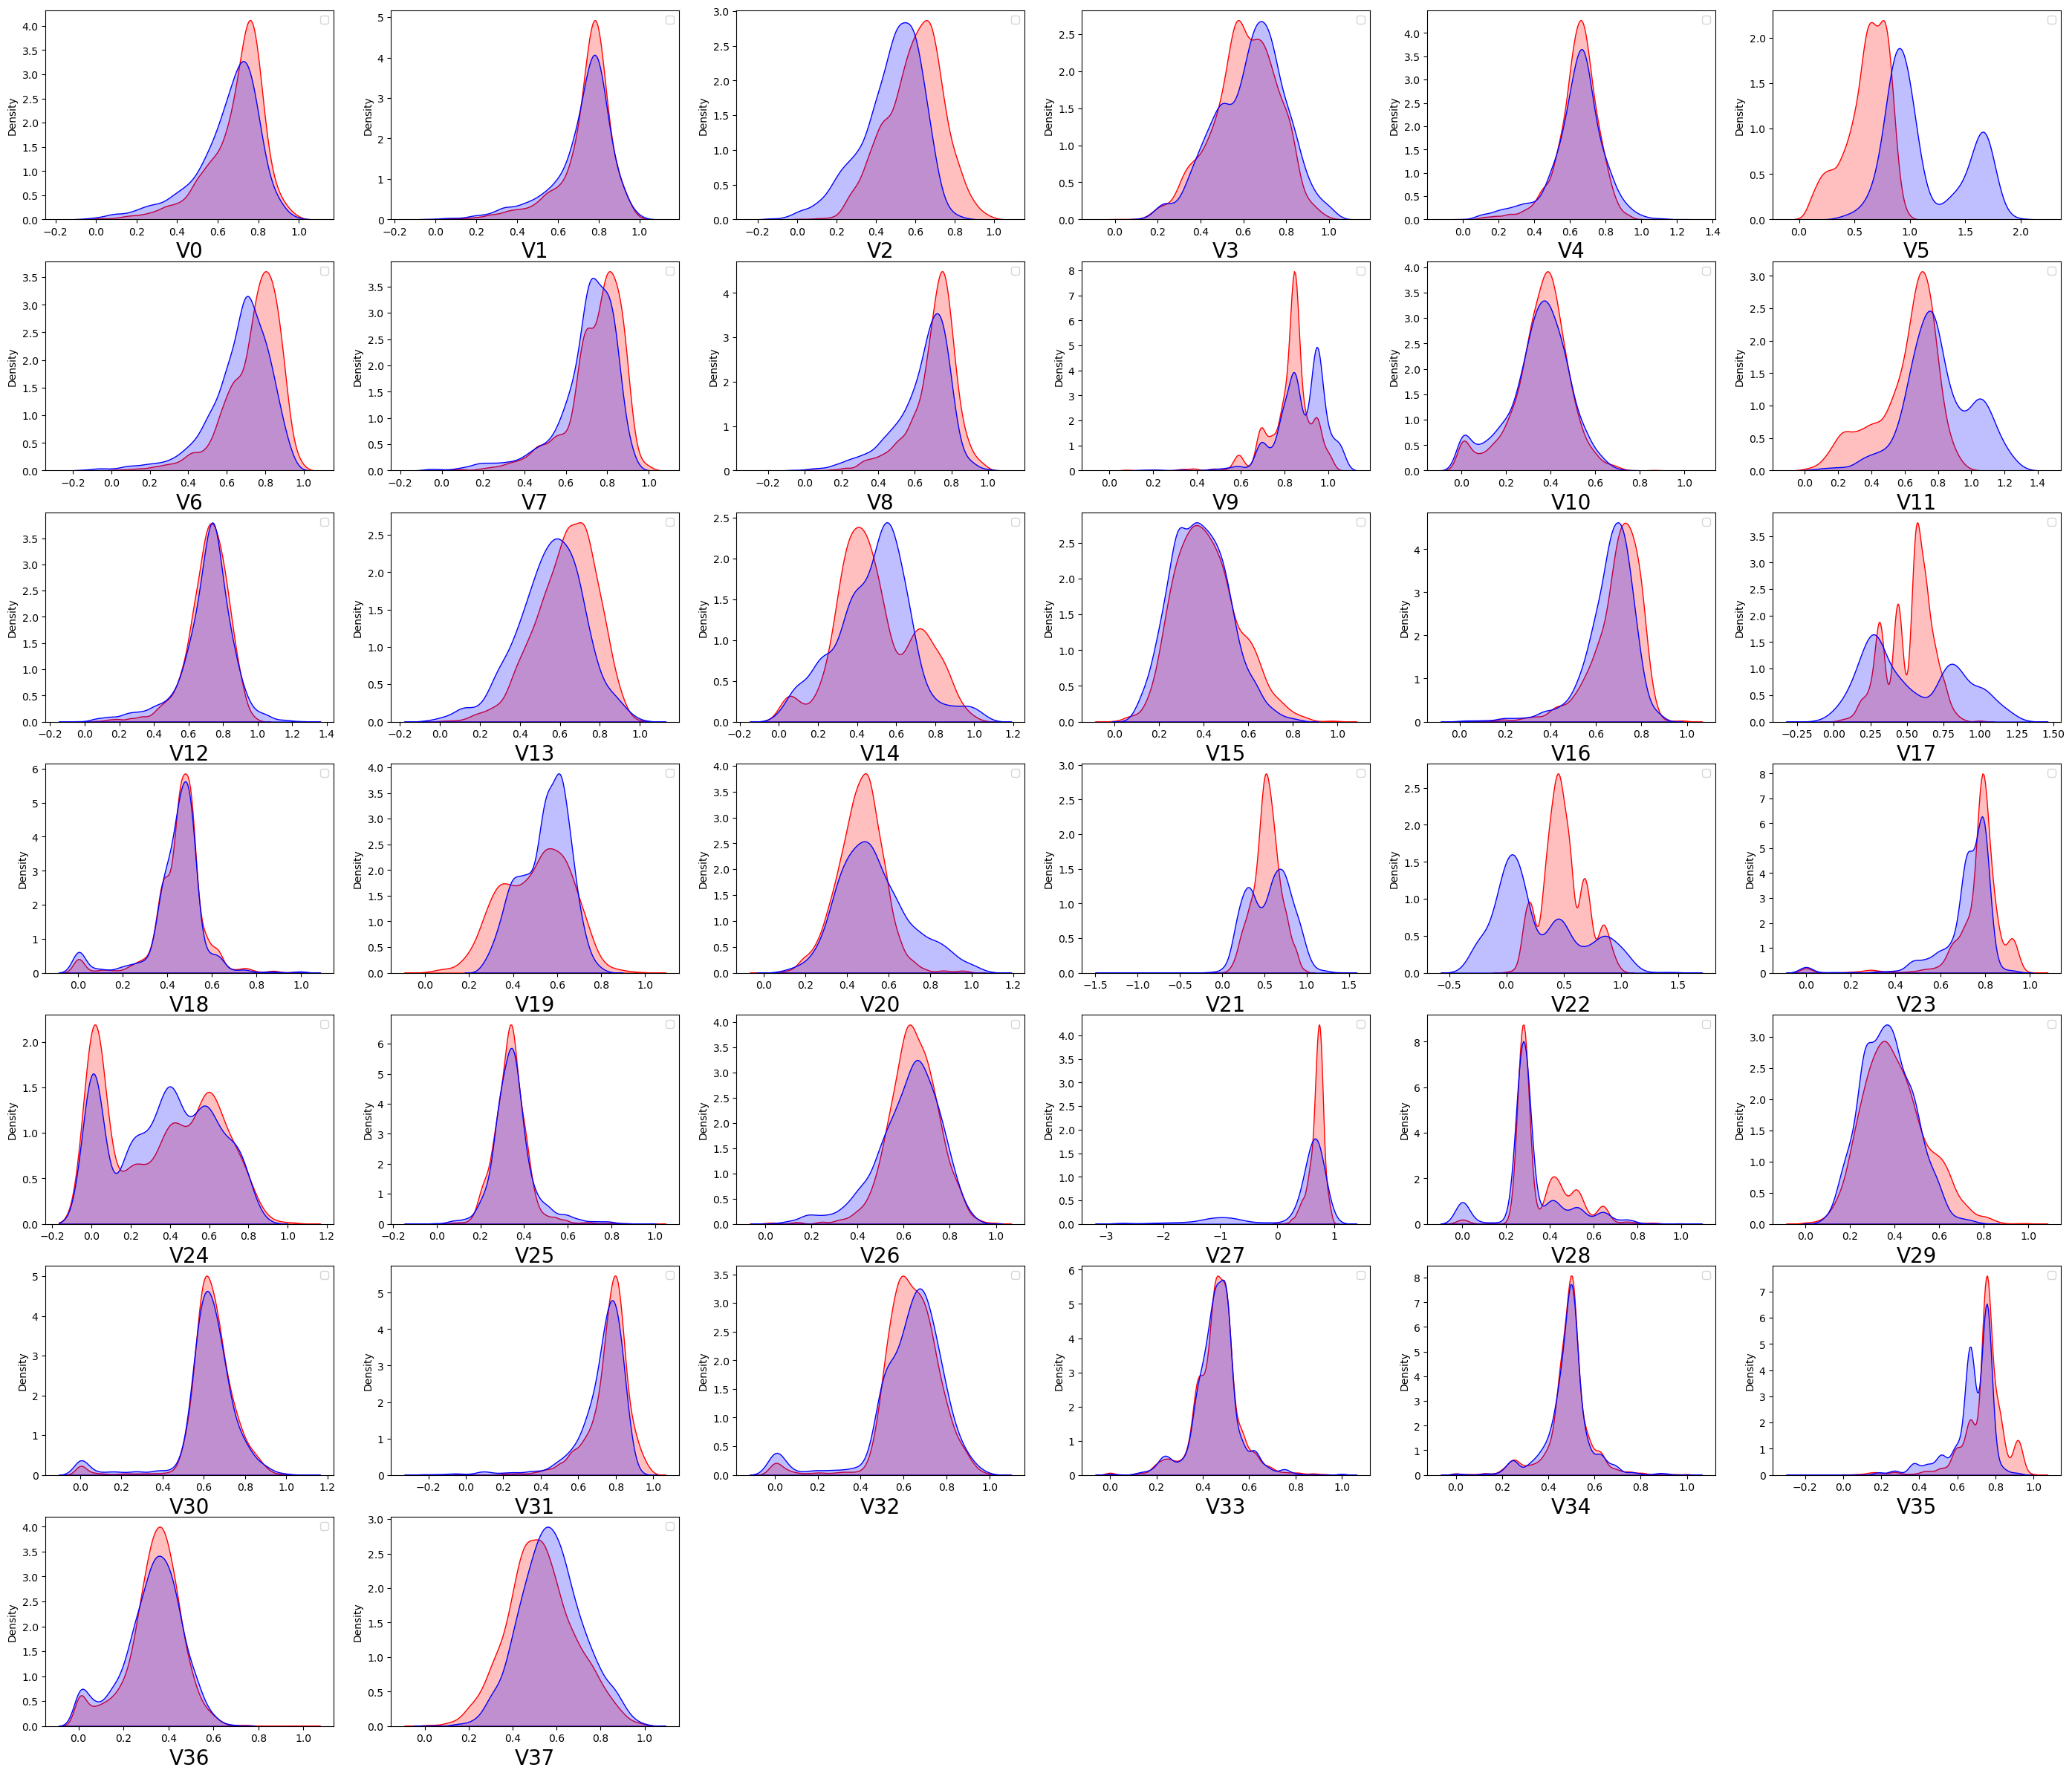

In [12]:
n_row = 7
n_col = 6
plt.figure(figsize=(n_row*5, n_col*5))
for i,col in enumerate(train_data_scaled.columns[:-1]):
    ax = plt.subplot(n_row, n_col, i+1)
    sns.kdeplot(train_data_scaled[col], ax=ax, color='r', shade=True)
    sns.kdeplot(test_data_scaled[col], ax=ax, color='b', shade=True)
    ax.set_xlabel(col,fontdict={'size':20})
    ax.legend('Train', 'Test')

In [13]:
# V5 V9 V11 V17 V22
drop_columns=['V5', 'V9', 'V11', 'V17', 'V22']
train_data_drop = train_data_scaled.drop(columns = drop_columns)
test_data_drop = test_data_scaled.drop(columns = drop_columns)
train_data_drop

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.759139,0.729830,0.524488,0.680337,0.698964,0.427136,0.385874,0.613522,0.221743,0.698875,...,0.406834,0.641467,0.666159,0.679280,0.000000,0.000000,0.074074,0.000000,0.018401,0.175
1,0.821406,0.789631,0.557939,0.705130,0.664244,0.465152,0.385874,0.724232,0.373887,0.690502,...,0.371596,0.643552,0.748349,0.721619,0.374950,0.499949,0.755580,0.289702,0.437406,0.676
2,0.828377,0.808239,0.584987,0.674567,0.653210,0.495905,0.385874,0.733458,0.466415,0.699012,...,0.387480,0.676487,0.779472,0.610577,0.374950,0.499949,0.755580,0.429901,0.458673,0.633
3,0.785006,0.779830,0.592670,0.642601,0.718746,0.521712,0.425208,0.734467,0.350013,0.706972,...,0.390683,0.684269,0.779726,0.722084,0.374950,0.477220,0.755580,0.374841,0.530618,0.206
4,0.777416,0.818182,0.588988,0.649462,0.683488,0.541338,0.425208,0.721638,0.314675,0.736206,...,0.413107,0.776126,0.785950,0.693393,0.374950,0.462067,0.755580,0.296712,0.543288,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,0.700898,0.724006,0.525288,0.641977,0.718880,0.824138,0.808498,0.672625,0.396412,0.768735,...,0.405766,0.597415,0.847053,0.601737,0.482957,0.481059,0.666667,0.405812,0.650980,0.892
2882,0.750000,0.806676,0.594750,0.645408,0.709460,0.822902,0.808498,0.753784,0.340302,0.765715,...,0.427523,0.586437,0.803354,0.580490,0.534086,0.534094,0.666667,0.254015,0.490196,0.812
2883,0.610440,0.625142,0.469750,0.629970,0.656439,0.808376,0.812805,0.558455,0.380901,0.683503,...,0.427523,0.601445,0.778328,0.714175,0.534086,0.534094,0.666667,0.453607,0.660332,0.235
2884,0.637546,0.687500,0.492318,0.609231,0.698560,0.793695,0.808355,0.590457,0.295252,0.701620,...,0.417512,0.773763,0.737805,0.787221,0.545482,0.545409,0.681506,0.294035,0.631222,1.042


### 1.5 相关性分析

删除和target 无关的特征

In [14]:
mcorr = train_data_drop.corr(method="spearman")  # 建议使用spearman，而非spearson相关系数
mcorr

,V0,V1,V2,V3,V4,V6,V7,V8,V10,V12,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.894116,0.516817,0.401150,0.697430,0.131507,0.075732,0.832151,0.279350,0.640696,...,0.334603,0.099242,0.739116,-0.052036,0.055408,-0.027534,0.038985,0.214930,-0.472200,0.712018
V1,0.894116,1.000000,0.490239,0.363749,0.651615,0.147037,0.082766,0.849034,0.255763,0.596173,...,0.240964,0.109216,0.807585,-0.016145,0.022355,-0.047777,0.033517,0.192985,-0.397080,0.682382
V2,0.516817,0.490239,1.000000,0.417190,0.062134,0.546921,0.378984,0.676417,0.292769,0.055734,...,-0.255559,0.176236,0.589890,-0.008968,0.049836,-0.046112,-0.052242,0.259475,-0.731786,0.586243
V3,0.401150,0.363749,0.417190,1.000000,0.294049,0.181135,0.132564,0.400915,0.295181,0.286500,...,0.128079,0.055660,0.420134,-0.130474,-0.031431,-0.053124,-0.015368,0.299063,-0.219751,0.500986
V4,0.697430,0.651615,0.062134,0.294049,1.000000,-0.204780,-0.150577,0.455801,0.123829,0.897807,...,0.692626,-0.053976,0.521226,-0.100889,0.059702,0.031946,0.103675,0.099359,0.040396,0.477291
V6,0.131507,0.147037,0.546921,0.181135,-0.204780,1.000000,0.904614,0.355064,0.336357,-0.195140,...,-0.486682,0.201834,0.340145,0.123955,0.037174,-0.062891,-0.132137,0.346400,-0.401118,0.281192
V7,0.075732,0.082766,0.378984,0.132564,-0.150577,0.904614,1.000000,0.278231,0.242818,-0.157087,...,-0.360490,0.196347,0.277283,0.106841,0.001128,-0.104462,-0.042936,0.268044,-0.284305,0.186106
V8,0.832151,0.849034,0.676417,0.400915,0.455801,0.355064,0.278231,1.000000,0.351127,0.368572,...,0.050211,0.165204,0.841469,-0.012464,0.017718,-0.075899,0.038208,0.263291,-0.507057,0.679547
V10,0.279350,0.255763,0.292769,0.295181,0.123829,0.336357,0.242818,0.351127,1.000000,0.110155,...,-0.060440,0.027257,0.445335,-0.075322,0.021506,-0.021099,-0.061219,0.892160,-0.025552,0.449573
V12,0.640696,0.596173,0.055734,0.286500,0.897807,-0.195140,-0.157087,0.368572,0.110155,1.000000,...,0.732617,-0.054432,0.471528,-0.073735,0.056376,0.038469,0.113580,0.085296,0.028055,0.459083


In [15]:
mask = np.zeros_like(mcorr, dtype=np.bool)  
mask[np.triu_indices_from(mask)] = True  # triu_indices_from获取矩阵上三角元素的索引
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

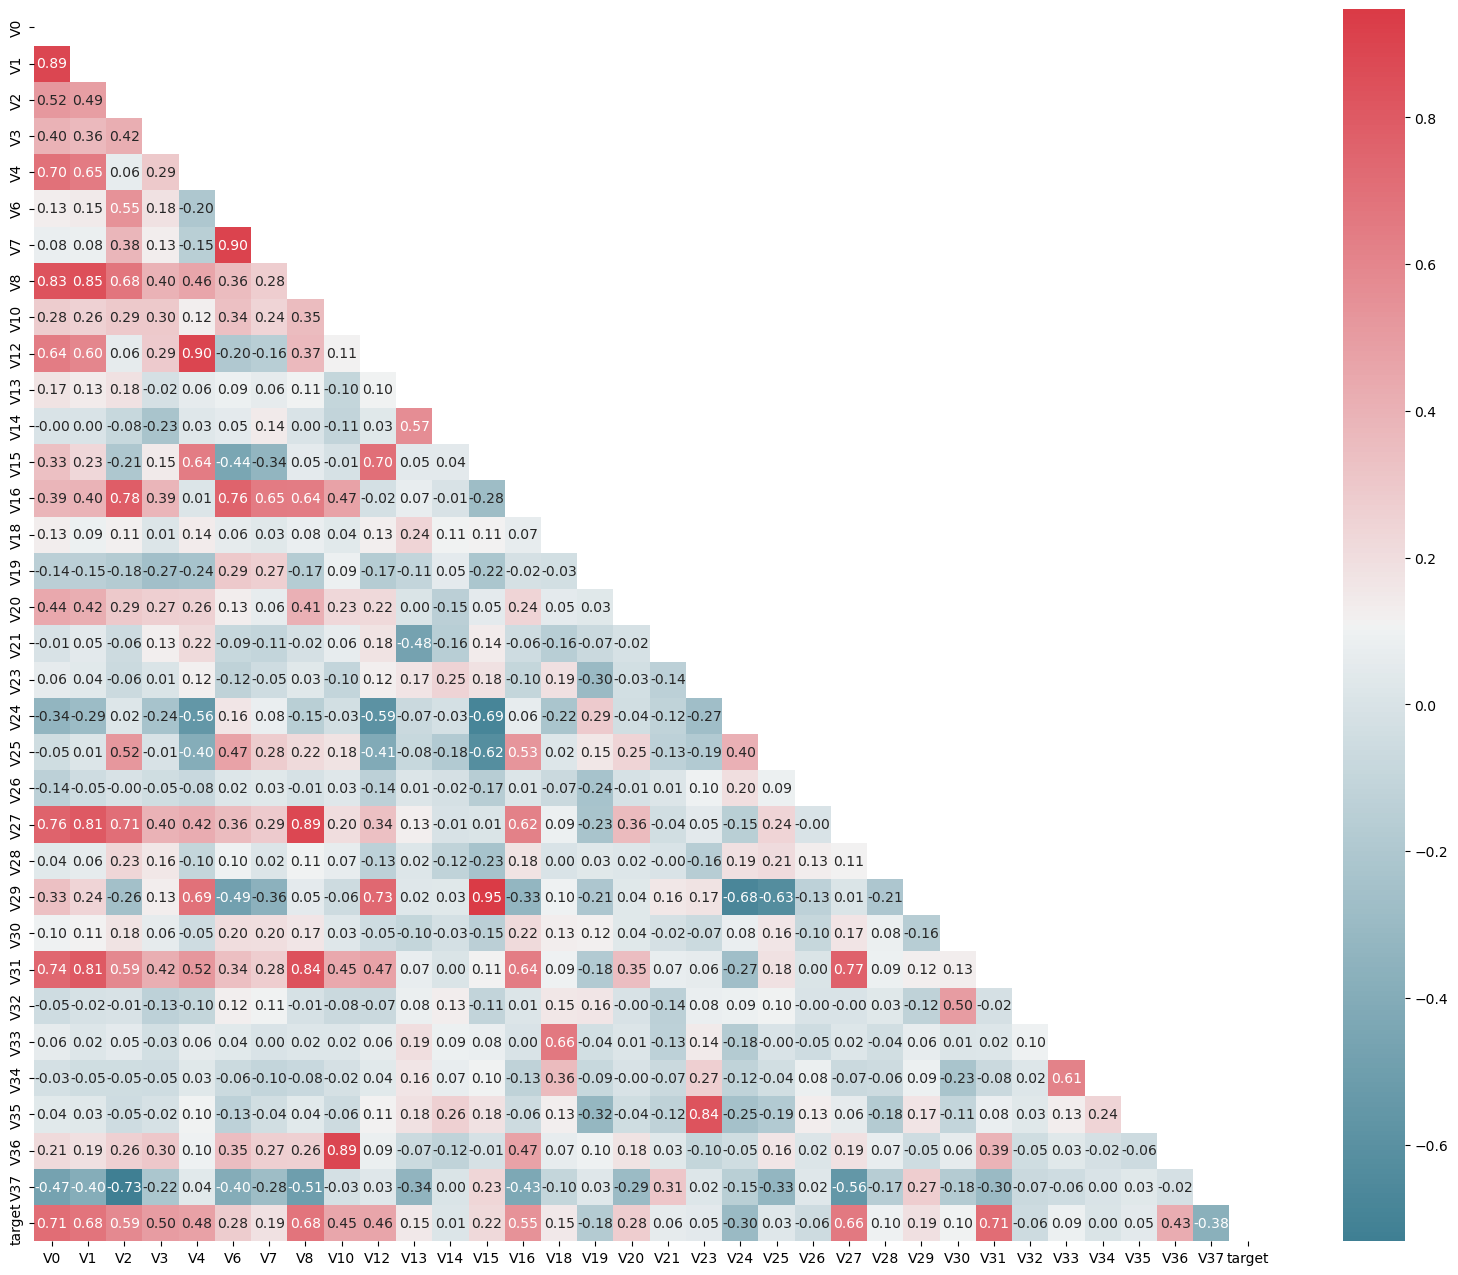

In [16]:
plt.figure(figsize=(20, 16))  
cmap = sns.diverging_palette(220, 10, as_cmap=True)  
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')  

In [17]:
# 相关性排名
mcorr=mcorr.abs()
numerical_corr=mcorr[mcorr['target']>0.1]['target']
print(numerical_corr.sort_values(ascending=False))


target    1.000000
V0        0.712018
V31       0.711920
V1        0.682382
V8        0.679547
V27       0.657386
V2        0.586243
V16       0.546358
V3        0.500986
V4        0.477291
V12       0.459083
V10       0.449573
V36       0.426914
V37       0.376758
V24       0.304309
V6        0.281192
V20       0.277609
V15       0.219841
V29       0.188253
V7        0.186106
V19       0.180808
V18       0.150429
V13       0.149656
V30       0.102274
Name: target, dtype: float64


In [18]:

# 相关性初筛
features_corr = numerical_corr.sort_values(ascending=False).reset_index()
features_corr.columns = ['features_and_target', 'corr']
features_corr_select = features_corr[features_corr['corr']>0.3] # 筛选出大于相关性大于0.3的特征
print(features_corr_select)
select_features = [col for col in features_corr_select['features_and_target'] if col not in ['target']]
train_data_corr_select = train_data_drop[select_features+['target']]
test_data_corr_select = test_data_drop[select_features]
print(f"test_data_corr_select shape:{ test_data_corr_select.shape }")
train_data_corr_select.describe()

#只剩14个特征

   features_and_target      corr
0               target  1.000000
1                   V0  0.712018
2                  V31  0.711920
3                   V1  0.682382
4                   V8  0.679547
5                  V27  0.657386
6                   V2  0.586243
7                  V16  0.546358
8                   V3  0.500986
9                   V4  0.477291
10                 V12  0.459083
11                 V10  0.449573
12                 V36  0.426914
13                 V37  0.376758
14                 V24  0.304309
test_data_corr_select shape:(1925, 14)


,V0,V31,V1,V8,V27,V2,V16,V3,V4,V12,V10,V36,V37,V24,target
count,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000,2886.000000
mean,0.690633,0.760495,0.735633,0.702053,0.687717,0.593844,0.689268,0.606212,0.639787,0.711946,0.353182,0.336235,0.527608,0.351218,0.126175
std,0.143740,0.110938,0.133703,0.129098,0.129398,0.145844,0.111216,0.151311,0.119504,0.122571,0.130372,0.123663,0.153192,0.274291,0.984283
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.044000
25%,0.626239,0.722593,0.695703,0.653489,0.633437,0.497759,0.642643,0.515087,0.586328,0.651386,0.291880,0.279792,0.427036,0.040616,-0.350750
50%,0.727153,0.782330,0.766335,0.728557,0.712781,0.609155,0.711038,0.609855,0.652873,0.725775,0.369706,0.349860,0.519457,0.382002,0.312500
75%,0.783922,0.824949,0.812642,0.781029,0.768789,0.694422,0.764052,0.714096,0.712152,0.793405,0.432021,0.414447,0.621870,0.604128,0.793750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.538000


### 1.6 特征降维

PCA降维

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
train_pca_90 = pca.fit_transform(train_data_corr_select.iloc[:,:-1])
test_pca_90 = pca.transform(test_data_corr_select)
train_pca_90 = pd.DataFrame(train_pca_90)
train_pca_90

,0,1,2,3,4
0,0.126162,-0.174748,-0.504283,0.076791,-0.226887
1,0.005874,-0.183260,-0.118849,-0.129949,-0.140346
2,-0.030214,-0.258210,0.016027,-0.183607,-0.075882
3,0.077924,-0.299641,-0.061394,-0.238634,-0.095224
4,0.020561,-0.174827,-0.110512,-0.168366,-0.087387
...,...,...,...,...,...
2881,-0.167143,0.325137,0.155609,0.004704,0.031083
2882,-0.263674,0.249286,-0.067058,0.094268,0.020012
2883,0.023460,0.376889,0.232603,0.076040,0.014099
2884,0.003844,0.392322,0.037691,0.083912,-0.000080


In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
train_pca_95 = pca.fit_transform(train_data_corr_select.iloc[:,:-1])
test_pca_95 = pca.transform(test_data_corr_select)
train_pca_95 = pd.DataFrame(train_pca_95)
train_pca_95

,0,1,2,3,4,5
0,0.126162,-0.174748,-0.504283,0.076791,-0.226887,-0.307089
1,0.005874,-0.183260,-0.118849,-0.129949,-0.140346,-0.073287
2,-0.030214,-0.258210,0.016027,-0.183607,-0.075882,-0.108346
3,0.077924,-0.299641,-0.061394,-0.238634,-0.095224,-0.009878
4,0.020561,-0.174827,-0.110512,-0.168366,-0.087387,0.036453
...,...,...,...,...,...,...
2881,-0.167143,0.325137,0.155609,0.004704,0.031083,0.040802
2882,-0.263674,0.249286,-0.067058,0.094268,0.020012,0.023451
2883,0.023460,0.376889,0.232603,0.076040,0.014099,-0.018698
2884,0.003844,0.392322,0.037691,0.083912,-0.000080,0.025220


In [46]:
target = train_data_corr_select['target']
target

0       0.175
1       0.676
2       0.633
3       0.206
4       0.384
        ...  
2881    0.892
2882    0.812
2883    0.235
2884    1.042
2885    0.005
Name: target, Length: 2886, dtype: float64

##  2. 模型训练

In [50]:
from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
import xgboost as XGBRegressor #xgboost回归模型

from sklearn.preprocessing import PolynomialFeatures # 多项式处理
from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [47]:
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train_pca_90,target,test_size=0.2,random_state=0)

In [40]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    print(train_scores_mean)
    print(test_scores_mean)
    
    plt.grid()
 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
 
    plt.legend(loc="best")
    return plt

多元线性模型

In [49]:
lr = LinearRegression()
lr.fit(train_data, train_target)
score = mean_squared_error(test_target, lr.predict(test_data) )
score

0.2829953664459301

[0.64562248 0.63958259 0.63895093 0.63728367 0.63496969]
[0.60842039 0.6208379  0.6234596  0.62386792 0.62394409]


<module 'matplotlib.pyplot' from 'A:\\PythonDevelopment\\lib\\site-packages\\matplotlib\\pyplot.py'>

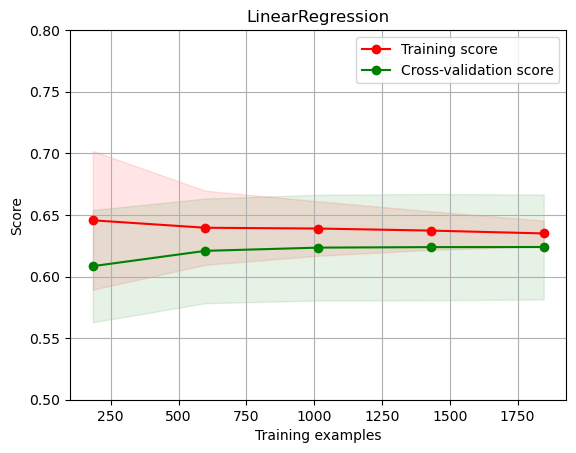

In [58]:
# 绘制学习曲线
X = train_data.values
y = train_target.values
 
# 图一
title = r"LinearRegression"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LinearRegression()    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 0.8), cv=cv, n_jobs=1)


K近邻回归

In [54]:
knr = KNeighborsRegressor(n_neighbors=8)
knr.fit(train_data, train_target)
score = mean_squared_error(test_target, knr.predict(test_data) )
score

0.28106600478481836

[0.67510919 0.70253785 0.70667575 0.70823522 0.70765977]
[0.58124901 0.61067676 0.61654045 0.62063899 0.6201517 ]


<module 'matplotlib.pyplot' from 'A:\\PythonDevelopment\\lib\\site-packages\\matplotlib\\pyplot.py'>

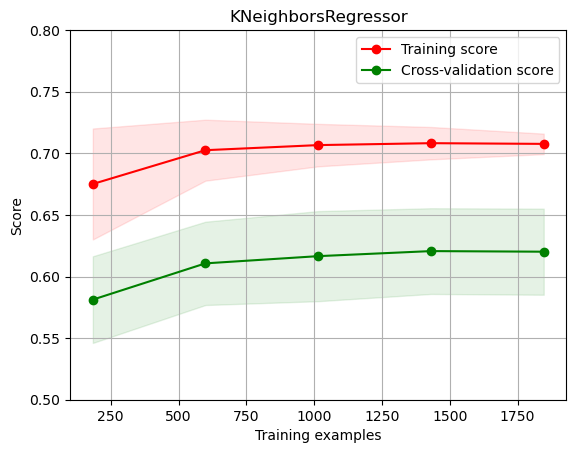

In [59]:

# 图二
title = r"KNeighborsRegressor"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = KNeighborsRegressor(n_neighbors=8)    #建模
plot_learning_curve(estimator, title, X, y, ylim=(0.5, 0.8), cv=cv, n_jobs=1)
